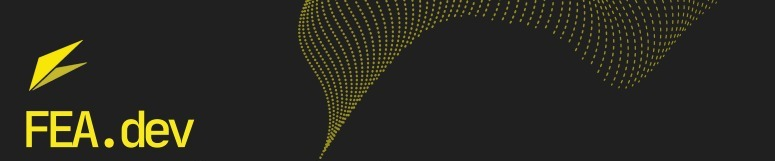


# Fala devs, blz?? 

Esta será nossa quinta lista de exercícios para você testar seu conhecimento acerca do conteúdo do MÓDULO 3:

-Pandas I

## INSTRUÇÕES:

A lista deve ser realizada pelo Jupyter Notebook.

Nâo é necessário entregar a lista para afins de certificado dentro da plataforma, entretanto para alunos da USP que queiram participar do processo seletivo ou conseguir créditos AAC (apenas FEANOS) é necessária a entrega de TODAS as listas.

A entrega das listas ou pelo menos sua excecução é recomendada a fim de exercitar todo o conhecimento adquirido do curso.

O DESAFIO é para realmente te desafiar, por isso não desista de tentar e de continuar com o curso, ao longo das listas você verá que cada vez mais você terá ferramentas para completá-lo.

Caso haja alguma dúvida acerca da lista participe das monitorias que serão oferecidas as quintas e sábados das 17h as 18h pelo DISCORD. Caso seu problema não seje resolvido envie uma mensagem para contato.feadev@gmail.com

O gabarito será disponibilizado na plataforma após o término de periodo de envio



In [162]:
## vamos começar??
## Sim

Toda nossa lista 5 abordará uma temática única de acordo com a base de dados escolhida para a realização da mesma.

**PAÍSES MENOS CORRUPTOS SÃO MAIS FELIZES?**

Será que a felicidade e a corrupção têm alguma relação? A resposta a essa pergunta não é tão clara quanto gostaríamos que fosse. A felicidade é o que todos desejam, enquanto a corrupção é frequentemente vista como algo que a sociedade deve combater. No entanto, a conexão direta entre esses dois conceitos é desafiadora de estabelecer.

A corrupção é prejudicial, pois mina a confiança nas instituições públicas e distorce a alocação de recursos. Isso certamente não soa como um ingrediente para a felicidade. No entanto, em muitos lugares, a corrupção é endêmica, mas as pessoas ainda relatam altos níveis de felicidade. Isso nos faz questionar se a percepção de felicidade pode ser independente da corrupção.

Talvez as pessoas se adaptem à corrupção, ou talvez outros fatores, como economia e segurança, desempenhem um papel mais significativo em sua felicidade. Em última análise, a relação entre felicidade e corrupção é complexa, e as respostas podem variar dependendo do contexto.

Portanto, a questão persiste: **será que a corrupção realmente impede a felicidade? Ou será que a felicidade pode ser encontrada em meio à corrupção?**

vamos utilizar da base de dados Happiness and Corruption 2015-2020

https://www.kaggle.com/datasets/eliasturk/world-happiness-based-on-cpi-20152020

para chegar em alguma conclusão sobre o tema

## QUESTÃO 0

Carregue os dados do arquivo "happiness_corruption.csv" em um DataFrame e mostre as primeiras 5 linhas do DataFrame 

baixe a base pelo link abaixo: https://www.kaggle.com/datasets/eliasturk/world-happiness-based-on-cpi-20152020

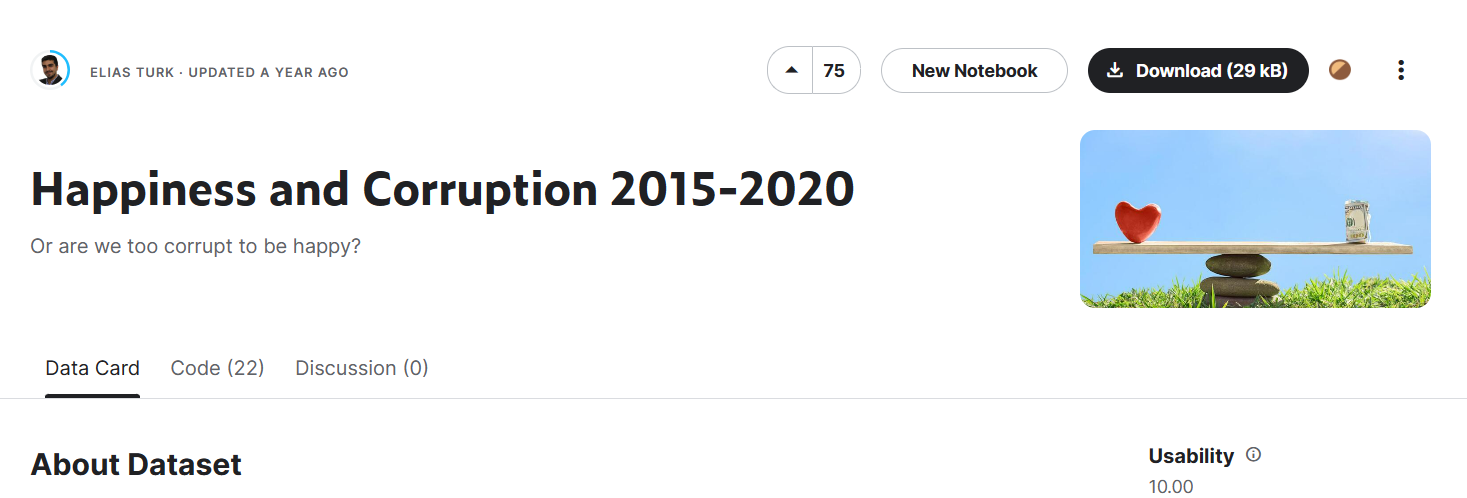

In [5]:
#seu código começa aqui
import zipfile
import pandas as pd

with zipfile.ZipFile('archive.zip', 'r') as data_zip:
    data_zip.extract('WorldHappiness_Corruption_2015_2020.csv')

df = pd.read_csv('WorldHappiness_Corruption_2015_2020.csv')
df.head(5)

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


## QUESTÃO 1


**Exploração Inicial dos Dados**

a) Verifique o número de linhas e colunas no DataFrame. **lembre-se do método .shape**


In [10]:
#seu codigo começa aqui
numero_linhas, numero_colunas = df.shape
print(f'linhas: {numero_linhas} \ncolunas: {numero_colunas}')

linhas: 792 
colunas: 13


b) Liste as colunas presentes no DataFrame. **lembre-se do método .columns**


In [24]:
#seu codigo começa aqui
list(df.columns)

['Country',
 'happiness_score',
 'gdp_per_capita',
 'family',
 'health',
 'freedom',
 'generosity',
 'government_trust',
 'dystopia_residual',
 'continent',
 'Year',
 'social_support',
 'cpi_score']

c) Verifique se há valores nulos em cada coluna.

In [26]:
#seu codigo começa aqui

df.isnull().sum()

Country              0
happiness_score      0
gdp_per_capita       0
family               0
health               0
freedom              0
generosity           0
government_trust     0
dystopia_residual    0
continent            0
Year                 0
social_support       0
cpi_score            0
dtype: int64

## QUESTÃO 2

a) Remova as colunas não relevantes que não serão usadas na análise, como "generosity" (generosidade), "family"(familia),
"health"( saúde), "freedom" (liberdade), "dystopia_residual"(distopia residual), "social_support" (suporte social) e "cpi_score"

In [36]:
#seu codigo começa aqui
colunas_desnecessarias = ['generosity', 'family', 'health', 'freedom', 
                          'dystopia_residual', 'social_support', 'cpi_score']
novo_df = df.drop(columns=colunas_desnecessarias)
novo_df

,Country,happiness_score,gdp_per_capita,government_trust,continent,Year
0,Norway,7.5370,1.616463,0.315964,Europe,2015
1,Denmark,7.5220,1.482383,0.400770,Europe,2015
2,Iceland,7.5040,1.480633,0.153527,Europe,2015
3,Switzerland,7.4940,1.564980,0.367007,Europe,2015
4,Finland,7.4690,1.443572,0.382612,Europe,2015
...,...,...,...,...,...,...
787,Botswana,3.4789,0.997549,0.101786,Africa,2020
788,Tanzania,3.4762,0.457163,0.203881,Africa,2020
789,Rwanda,3.3123,0.343243,0.485542,Africa,2020
790,Zimbabwe,3.2992,0.425564,0.080929,Africa,2020


b) 
Renomeie as colunas para torná-las mais descritivas. Por exemplo, renomeie "Score" para "Pontuacao_Felicidade", "Country" para "Países", "GDP per capita" para "PIB_Per_Capita", "continent" para "Continentes", "Year" para "ano" e government_trust para "confian_gov".

In [38]:
#seu codigo começa aqui
novos_nomes_colunas = {'happiness_score': 'Pontuacao_Felicidade',
                       'Country': 'Paises',
                       'gdp_per_capita': 'PBI_Per_Capita',
                       'continent': 'Continentes',
                       'Year': 'Ano',
                       'government_trust': 'confian_gov'
                       }
novo_df.rename(columns=novos_nomes_colunas)

,Paises,Pontuacao_Felicidade,PBI_Per_Capita,confian_gov,Continentes,Ano
0,Norway,7.5370,1.616463,0.315964,Europe,2015
1,Denmark,7.5220,1.482383,0.400770,Europe,2015
2,Iceland,7.5040,1.480633,0.153527,Europe,2015
3,Switzerland,7.4940,1.564980,0.367007,Europe,2015
4,Finland,7.4690,1.443572,0.382612,Europe,2015
...,...,...,...,...,...,...
787,Botswana,3.4789,0.997549,0.101786,Africa,2020
788,Tanzania,3.4762,0.457163,0.203881,Africa,2020
789,Rwanda,3.3123,0.343243,0.485542,Africa,2020
790,Zimbabwe,3.2992,0.425564,0.080929,Africa,2020


## QUESTÃO 3



**Estatísticas Descritivas**

Calcule estatísticas descritivas para as colunas relevantes: "Score" (pontuação de felicidade), "GDP per capita" (PIB per capita) e "Corruption Perception" (percepção de corrupção) e . Mostre a média, mediana, desvio padrão, mínimo e máximo para cada uma dessas colunas.

In [48]:
# seu código começa aqui 
colunas_relevantes = ['happiness_score', 'gdp_per_capita', 'government_trust']
estatistica_descritiva = df[colunas_relevantes].describe()
estatistica_descritiva


,happiness_score,gdp_per_capita,government_trust
count,792.000000,792.000000,792.000000
mean,5.473310,0.929217,0.125720
std,1.124726,0.385774,0.109032
min,2.566900,0.000000,0.000000
25%,4.590750,0.644242,0.052862
50%,5.485500,0.994544,0.089000
75%,6.300500,1.228677,0.154250
max,7.808700,2.096000,0.551910


## QUESTÃO 4

Vamos usar somente o ano de 2019 para facilitar a análise.

a) Incluir no dataframe apenas as linhas do ano de 2019

In [70]:
#seu codigo começa aqui
df_selected_year = df[df['Year'] == 2019]
df_selected_year


,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
528,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.36171,0.44453,2.73939,Europe,2019,0.0,87
529,Switzerland,7.509,1.52733,1.14524,0.86303,0.58557,0.28083,0.41203,2.69463,Europe,2019,0.0,85
530,Iceland,7.501,1.42666,1.18326,0.86733,0.56624,0.47678,0.14975,2.83137,Europe,2019,0.0,78
531,Norway,7.498,1.57744,1.12690,0.79579,0.59609,0.37895,0.35776,2.66465,Europe,2019,0.0,84
532,Finland,7.413,1.40598,1.13464,0.81091,0.57104,0.25492,0.41004,2.82596,Europe,2019,0.0,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Rwanda,3.515,0.32846,0.61586,0.31865,0.54320,0.23552,0.50521,0.96819,Africa,2019,0.0,53
656,Benin,3.484,0.39499,0.10419,0.21028,0.39747,0.20180,0.06681,2.10812,Africa,2019,0.0,41
657,Afghanistan,3.360,0.38227,0.11037,0.17344,0.16430,0.31268,0.07112,2.14558,Asia,2019,0.0,16
658,Togo,3.303,0.28123,0.00000,0.24811,0.34678,0.17517,0.11587,2.13540,Africa,2019,0.0,29


b) Criar um novo DataFrame com países que têm pontuação de felicidade acima da média global ( do exercicio anterior)

In [76]:
#seu codigo começa aqui
media_global = df_selected_year['happiness_score'].mean()
df_acima_media = df_selected_year[df_selected_year['happiness_score'] > media_global]
df_acima_media


,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
528,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.36171,0.44453,2.73939,Europe,2019,0.0,87
529,Switzerland,7.509,1.52733,1.14524,0.86303,0.58557,0.28083,0.41203,2.69463,Europe,2019,0.0,85
530,Iceland,7.501,1.42666,1.18326,0.86733,0.56624,0.47678,0.14975,2.83137,Europe,2019,0.0,78
531,Norway,7.498,1.57744,1.12690,0.79579,0.59609,0.37895,0.35776,2.66465,Europe,2019,0.0,84
532,Finland,7.413,1.40598,1.13464,0.81091,0.57104,0.25492,0.41004,2.82596,Europe,2019,0.0,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,Paraguay,5.538,0.89373,1.11111,0.58295,0.46235,0.25296,0.07396,2.16091,South America,2019,0.0,28
589,Romania,5.528,1.16970,0.72803,0.67602,0.36712,0.12889,0.00679,2.45184,Europe,2019,0.0,44
590,Estonia,5.517,1.27964,1.05163,0.68098,0.41511,0.08423,0.18519,1.81985,Europe,2019,0.0,74
591,Jamaica,5.510,0.89333,0.96372,0.59469,0.43597,0.22245,0.04294,2.35682,South America,2019,0.0,43


# QUESTÃO 5

**Classificação**

Classifique o DataFrame resultante do Exercício 4 pela coluna "Score" em ordem decrescente. Mostre os 10 países com as maiores pontuações de felicidade. Isso é útil para responder a perguntas como:

Quais países têm os maiores níveis de felicidade? A classificação em ordem decrescente fornece uma lista dos países com as maiores pontuações de felicidade, destacando aqueles que estão no topo da lista.

Houve alguma mudança significativa na classificação da felicidade ao longo do tempo? Comparando a classificação em diferentes anos, é possível identificar se houve mudanças significativas na pontuação de felicidade de países específicos.

Quais países são modelos de sucesso em termos de felicidade? A classificação ajuda a identificar países que são frequentemente citados como exemplos de sucesso em termos de bem-estar e qualidade de vida.

In [83]:
#SEU CÓDIGO COMEÇA AQUI##
df_acima_media.sort_values(by='happiness_score', ascending=False)
df_acima_media.head(10)


,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
528,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.36171,0.44453,2.73939,Europe,2019,0.0,87
529,Switzerland,7.509,1.52733,1.14524,0.86303,0.58557,0.28083,0.41203,2.69463,Europe,2019,0.0,85
530,Iceland,7.501,1.42666,1.18326,0.86733,0.56624,0.47678,0.14975,2.83137,Europe,2019,0.0,78
531,Norway,7.498,1.57744,1.12690,0.79579,0.59609,0.37895,0.35776,2.66465,Europe,2019,0.0,84
532,Finland,7.413,1.40598,1.13464,0.81091,0.57104,0.25492,0.41004,2.82596,Europe,2019,0.0,86
533,Canada,7.404,1.44015,1.09610,0.82760,0.57370,0.44834,0.31329,2.70485,North America,2019,0.0,77
534,Netherlands,7.339,1.46468,1.02912,0.81231,0.55211,0.47416,0.29927,2.70749,Europe,2019,0.0,82
535,New Zealand,7.334,1.36066,1.17278,0.83096,0.58147,0.49401,0.41904,2.47553,Australia,2019,0.0,87
536,Australia,7.313,1.44443,1.10476,0.85120,0.56837,0.47407,0.32331,2.54650,Australia,2019,0.0,77
537,Sweden,7.291,1.45181,1.08764,0.83121,0.58218,0.38254,0.40867,2.54734,Europe,2019,0.0,85


## QUESTÃO 6

**Agrupando Dados por Região**

Agrupe os dados por região (coluna "Region") e calcule a média das pontuações de felicidade para cada região. Ordene as regiões pela média de pontuação de felicidade em ordem decrescente.

In [108]:
### Seu código começa aqui  lembre do groupy.by
df.groupby('continent')['happiness_score'].mean().sort_values(ascending=False)


continent
Australia        7.289033
North America    7.000539
Europe           6.193717
South America    5.865516
Asia             5.267553
Africa           4.353944
Name: happiness_score, dtype: float64

## QUESTÃO 7

**Lidando com Dados Ausentes**

Verifique se há dados ausentes no DataFrame e, se houver, retire a linha inteira em questão. Certifique-se de que o DataFrame não possui mais dados ausentes após o preenchimento.

In [111]:
#seu código começa aqui
df.isnull().sum()

#Esse é o comando para retirar os nulos, mas para esse dataset, não temos
df.dropna() 


,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.5370,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.000000,88
1,Denmark,7.5220,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.000000,91
2,Iceland,7.5040,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.000000,79
3,Switzerland,7.4940,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.000000,86
4,Finland,7.4690,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.000000,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,Botswana,3.4789,0.997549,0.000000,0.494102,0.509089,0.033407,0.101786,0.257241,Africa,2020,1.085695,60
788,Tanzania,3.4762,0.457163,0.000000,0.442678,0.509343,0.271541,0.203881,0.718963,Africa,2020,0.872675,38
789,Rwanda,3.3123,0.343243,0.000000,0.572383,0.604088,0.235705,0.485542,0.548445,Africa,2020,0.522876,54
790,Zimbabwe,3.2992,0.425564,0.000000,0.375038,0.377405,0.151349,0.080929,0.841031,Africa,2020,1.047835,24


# Questão 8

Agora você tem uma base de dados limpa e com informações relevantes para responder algumas questões.

- Países mais ricos são mais felizes? 
- Países com maior confiança no governo (menos experiencias com corrupção) são mais felizes?
- Aonde se localizam os países mais felizes? Europa? Ásia?....


**Países com maior confiança no governo são mais felizes?**

a) Calcule a média da coluna "Confianca_Gov" para obter um valor médio que será usado como ponto de corte.

In [122]:
#seu codigo começa aqui
media_confianca = df['government_trust'].mean()

b) Com base na média calculada, crie uma nova coluna no DataFrame que atribuirá um rótulo ("alta" ou "baixa") a cada país de acordo com sua confiança no governo em relação à média.

In [123]:
#seu codigo começa aqui

# Função para atribuir os rótulos "alta" ou "baixa" com base na média

def atribuir_rotulo(valor):
     return 'alta' if valor >= media_confianca else 'baixa'

# Aplique a função para criar a nova coluna de rótulos
data = df
data['Rotulo_Confianca'] = data['government_trust'].apply(lambda x: atribuir_rotulo(x))  #O método apply é usado para aplicar uma função a cada valor da coluna "Confianca_Gov". Neste caso, a função rotulo_confianca é aplicada a cada valor individual da coluna.
# Exiba as primeiras linhas do DataFrame com a nova coluna

print(data.head())

       Country  happiness_score  gdp_per_capita    family    health   freedom  \
0       Norway            7.537        1.616463  1.533524  0.796667  0.635423   
1      Denmark            7.522        1.482383  1.551122  0.792566  0.626007   
2      Iceland            7.504        1.480633  1.610574  0.833552  0.627163   
3  Switzerland            7.494        1.564980  1.516912  0.858131  0.620071   
4      Finland            7.469        1.443572  1.540247  0.809158  0.617951   

   generosity  government_trust  dystopia_residual continent  Year  \
0    0.362012          0.315964           2.277027    Europe  2015   
1    0.355280          0.400770           2.313707    Europe  2015   
2    0.475540          0.153527           2.322715    Europe  2015   
3    0.290549          0.367007           2.276716    Europe  2015   
4    0.245483          0.382612           2.430182    Europe  2015   

   social_support  cpi_score Rotulo_Confianca  
0             0.0         88             alt

c) Após dividir os países em grupos, calcule a média da pontuação de felicidade para cada grupo separadamente.


In [128]:
#seu codigo começa aqui
media_por_grupo = data.groupby('Rotulo_Confianca')['happiness_score'].mean()
media_por_grupo

Rotulo_Confianca
alta     6.124543
baixa    5.138354
Name: happiness_score, dtype: float64

d) Use um gráfico de barras para representar a relação entre o nível de confiança no governo e a média da pontuação de felicidade. Cada barra no gráfico representa um grupo (alta ou baixa) e a altura da barra representa a média da pontuação de felicidade para esse grupo.

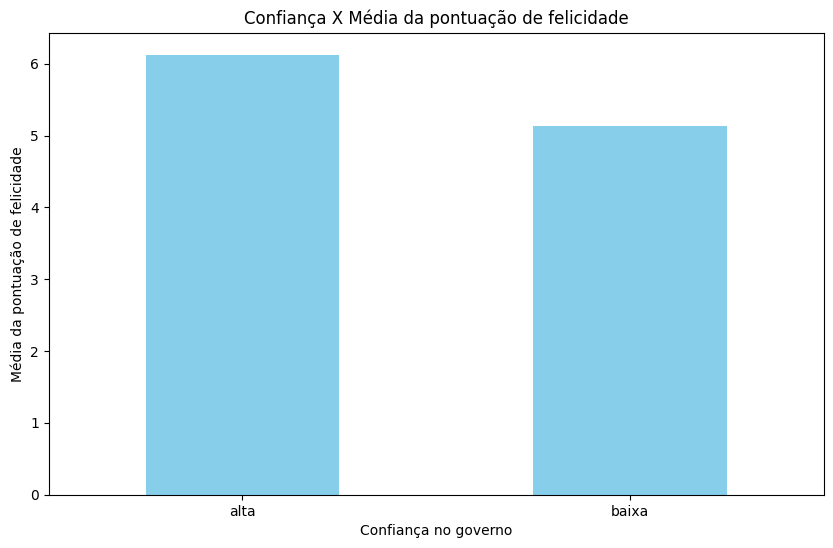

In [131]:
# seu codigo começa aqui
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
media_por_grupo.plot(kind='bar', color='skyblue') ## bar = grafico em barras  ## skyblue é a cor do grafico
plt.title('Confiança X Média da pontuação de felicidade')  ## dê um titulo 
plt.xlabel('Confiança no governo')  ## o que você quer no eixo x
plt.ylabel('Média da pontuação de felicidade')    ## o que você quer no eixo y
plt.xticks(rotation=0)
plt.show()

e) qual é a conclusão de **Países com maior confiança no governo são mais felizes?**

RESPOSTA: Sim


## QUESTÃO 9

**Países mais ricos são mais felizes?**

a) Crie um gráfico de dispersão (scatter plot) que mostre a relação entre a pontuação de felicidade e o PIB per capita. Coloque a pontuação de felicidade no eixo vertical (y) e o PIB per capita no eixo horizontal (x). Adicione rótulos aos eixos e um título informativo ao gráfico.

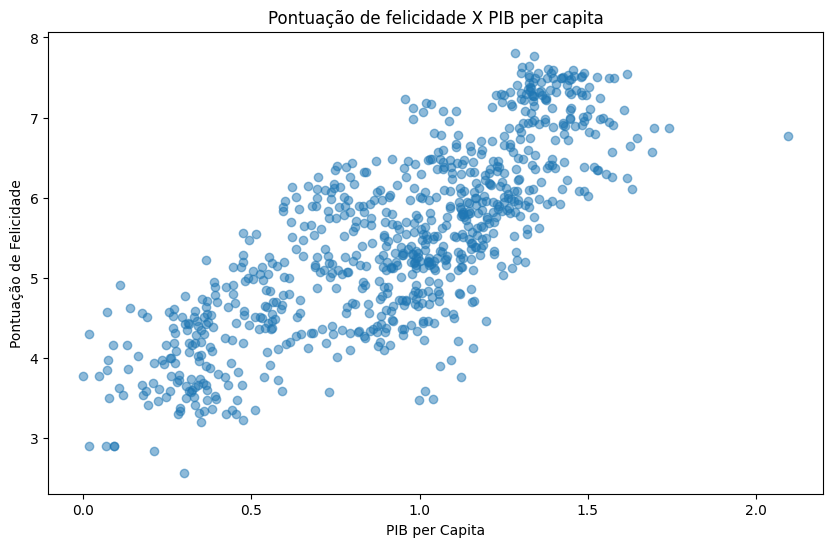

In [136]:
import matplotlib.pyplot as plt

# Defina os dados para os eixos x e y
x = data['gdp_per_capita'].values
y = data['happiness_score'].values

# Crie o gráfico de dispersão
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.scatter(x, y, alpha=0.5)  # Cria o scatter plot com transparência

# Adicione rótulos aos eixos
plt.xlabel('PIB per Capita')
plt.ylabel('Pontuação de Felicidade')
plt.title('Pontuação de felicidade X PIB per capita')

# Exiba o gráfico
plt.show()

b) Qual é a conclusão de **Países mais ricos são mais felizes?**

RESPOSTA: Sim

## QUESTÃO 10

**Aonde se localizam os países mais felizes? Europa? Ásia?....**

a) Calcule a média da pontuação de felicidade (Score) em todo o DataFrame.


In [138]:
##seu codigo começa aqui
media_pontuacao_felicidade = df['happiness_score'].mean()
media_pontuacao_felicidade


5.47330984670202

b) Crie dois DataFrames separados: um com os países com pontuação de felicidade acima da média e outro com os países com pontuação abaixo da média.

In [147]:
##seu codigo começa aqui
df_um = df[df['happiness_score'] > media_pontuacao_felicidade]
df_dois = df[df['happiness_score'] < media_pontuacao_felicidade]
df_um


,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score,Rotulo_Confianca
0,Norway,7.5370,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.000000,88,alta
1,Denmark,7.5220,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.000000,91,alta
2,Iceland,7.5040,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.000000,79,alta
3,Switzerland,7.4940,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.000000,86,alta
4,Finland,7.4690,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.000000,90,alta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,Kyrgyzstan,5.5415,0.513181,0.000000,0.680646,0.614618,0.301371,0.030467,2.060207,Asia,2020,1.341037,31,baixa
730,Belarus,5.5399,1.018854,0.000000,0.752589,0.290756,0.089933,0.193607,1.806991,Europe,2020,1.387139,47,alta
731,Greece,5.5150,1.128070,0.000000,0.979432,0.173516,0.000000,0.048844,2.016179,Europe,2020,1.168974,50,baixa
732,Croatia,5.5047,1.109024,0.000000,0.900576,0.381457,0.113999,0.012325,1.676029,Europe,2020,1.311265,47,baixa


c) Para cada um dos dois DataFrames criados no item b, crie subgrupos calculando a contagem de países por continente (coluna "Region"). dica: .value_counts()

In [152]:
##seu codigo começa aqui
sub_df_um = df_um.groupby('continent')['Country'].value_counts()
sub_df_dois = df_dois.groupby('continent')['Country'].value_counts()


d) Calcule a porcentagem que cada continente representa em relação ao total de países em cada grupo.

In [158]:
## lembre-se :porcentagem_acima_da_media = (contagem_acima_da_media / len(acima_da_media)) * 100

##seu codigo começa aqui

# Calcular a porcentagem de cada continente em relação ao total de países em cada grupo
porcentagem_relacao_grupo_um = sub_df_um.groupby(['continent']).size() / len(df_um) * 100
porcentagem_relacao_grupo_dois = sub_df_dois.groupby(['continent']).size() / len(df_dois) * 100


e) Crie gráficos de barras que mostrem a porcentagem de cada continente nos grupos de alta felicidade e baixa felicidade.

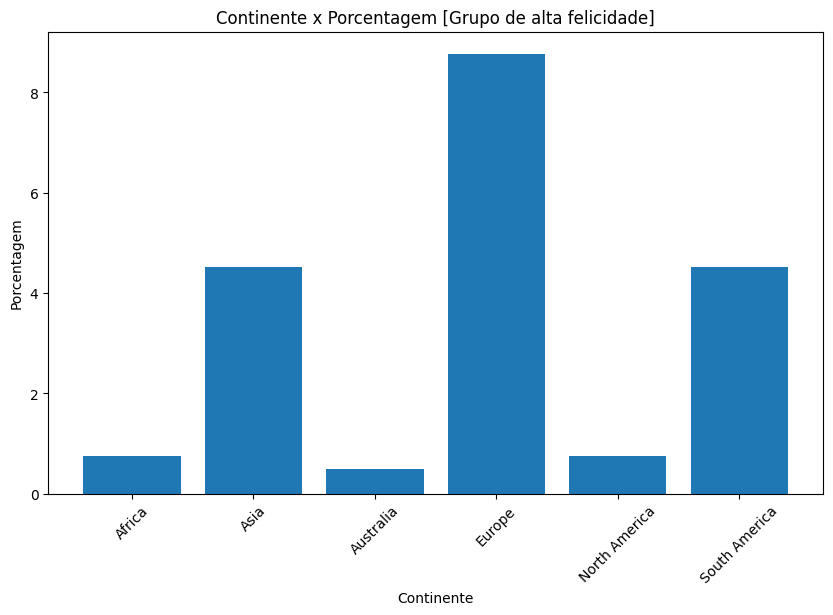

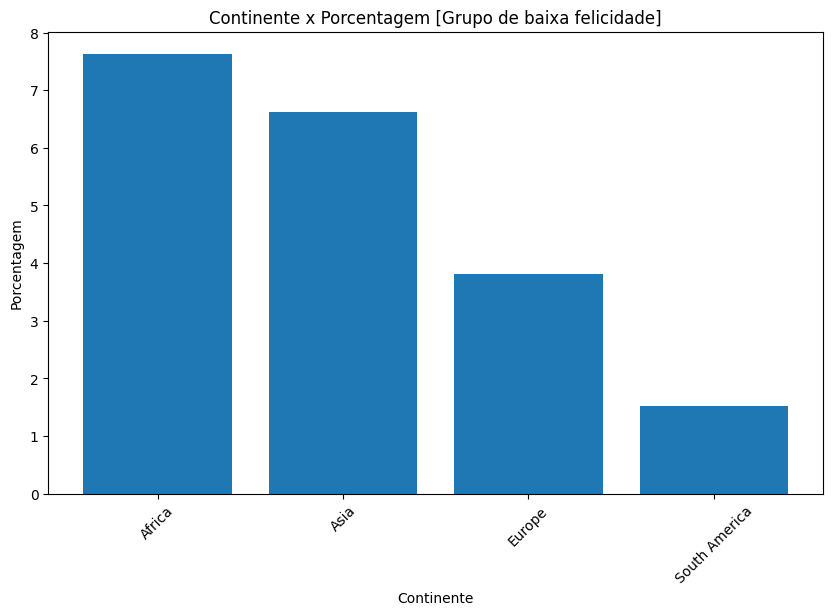

In [161]:

##seu codigo começa aqui

import matplotlib.pyplot as plt

# Gráfico de barras para o grupo de alta felicidade


plt.figure(figsize=(10, 6))
plt.bar(porcentagem_relacao_grupo_um.index, porcentagem_relacao_grupo_um)
plt.title('Continente x Porcentagem [Grupo de alta felicidade]')
plt.xlabel('Continente')
plt.ylabel('Porcentagem')
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

# Gráfico de barras para o grupo de baixa felicidade

### faça a mesma coisa do grafico acima porem para o grupo de baixa felicidade
plt.figure(figsize=(10, 6))
plt.bar(porcentagem_relacao_grupo_dois.index, porcentagem_relacao_grupo_dois)
plt.title('Continente x Porcentagem [Grupo de baixa felicidade]')
plt.xlabel('Continente')
plt.ylabel('Porcentagem')
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()


f)  Qual é a conclusão da questão: **Aonde se localizam os países mais felizes? Europa? Ásia?....**

RESPOSTA: Europa

APÓS A LISTA VOCÊ CONSEGUE ENXERGAR ALGUMA CONCLUSÃO SOBRE A QUESTÃO INICIAL DO TEMA?

Dinheiro e honestidade contribuem para uma população mais feliz.